In [56]:
import os

import pandas as pd
import numpy as np

import matplotlib as plt
import seaborn as sns

## Business Patterns by ZIP

In [11]:
os.chdir('/mnt/c/Users/jwnha/Documents/_School/MSDS/2022Summer/applicationDev/data/business_patterns_zip')

In [13]:
bp_zip = pd.read_csv('zbp20totals.txt', delimiter=',', encoding = 'unicode_escape', engine ='python')

In [14]:
bp_zip.head()

,zip,name,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,city,stabbr,cty_name
0,501,"HOLTSVILLE, NY",J,49,J,261,J,850,5,HOLTSVILLE,NY,SUFFOLK
1,1001,"AGAWAM, MA",G,7944,G,100626,G,409249,469,AGAWAM,MA,HAMPDEN
2,1002,"AMHERST, MA",H,7732,H,73903,H,294936,523,AMHERST,MA,HAMPSHIRE
3,1003,"AMHERST, MA",G,239,H,2515,H,9481,16,AMHERST,MA,HAMPSHIRE
4,1004,"AMHERST, MA",J,197,H,1439,H,5892,9,AMHERST,MA,HAMPSHIRE


In [29]:
bp_zip_1 = bp_zip[["zip", "emp", "est", "ap"]]

In [30]:
# rename columns to make them more intuitive
bp_zip_2 = bp_zip_1.rename(columns = {"emp": "num_employees", "est": "num_establishments", "ap": "annual_payroll_1000s"})

In [31]:
bp_zip_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35053 entries, 0 to 35052
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   zip                   35053 non-null  int64
 1   num_employees         35053 non-null  int64
 2   num_establishments    35053 non-null  int64
 3   annual_payroll_1000s  35053 non-null  int64
dtypes: int64(4)
memory usage: 1.1 MB


In [32]:
# convert zip column to a string and pad with zeros
bp_zip_2['zip'] = bp_zip_2['zip'].astype(str).str.zfill(5)

In [33]:
# Check that we don't have any duplicate zips
print(len(bp_zip_2.zip))
print(len(bp_zip_2.zip.drop_duplicates()))

35053
35053


In [38]:
# Summary Statistics
bp_zip_2['num_employees'].describe()

count    3.505300e+04
mean     3.823588e+03
std      3.550615e+04
min      0.000000e+00
25%      8.000000e+01
50%      4.230000e+02
75%      3.367000e+03
max      6.476624e+06
Name: num_employees, dtype: float64

In [54]:
bp_zip_2['average_salary'] = (bp_zip_2['annual_payroll_1000s']*1000)/bp_zip_2['num_employees']
bp_zip_2['average_salary'].describe()

count    3.505300e+04
mean              inf
std               NaN
min      1.224490e+03
25%      3.208814e+04
50%      3.964880e+04
75%      4.942221e+04
max               inf
Name: average_salary, dtype: float64

In [57]:
bp_zip_2[bp_zip_2['average_salary'] == np.inf]

,zip,num_employees,num_establishments,annual_payroll_1000s,average_salary
11444,32855,0,3,454,inf
31711,91102,0,3,92,inf
32660,93642,0,3,235,inf


In [61]:
bp_zip_2.loc[bp_zip_2['average_salary'] == np.inf, 'average_salary'] = bp_zip_2['annual_payroll_1000s']*1000

In [35]:
bp_zip_2['num_establishments'].describe()

count    35053.000000
mean       228.085356
std        443.894261
min          3.000000
25%         11.000000
50%         41.000000
75%        255.000000
max      33466.000000
Name: num_establishments, dtype: float64

In [36]:
bp_zip_2['annual_payroll_1000s'].describe()

count    3.505300e+04
mean     2.156041e+05
std      2.154285e+06
min      1.100000e+01
25%      2.958000e+03
50%      1.716600e+04
75%      1.425480e+05
max      3.820090e+08
Name: annual_payroll_1000s, dtype: float64

<AxesSubplot:>

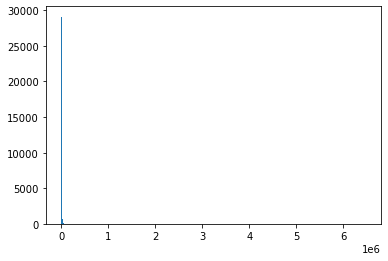

In [48]:
bp_zip_2['num_employees'].hist(bins=1000, grid=False)

<AxesSubplot:>

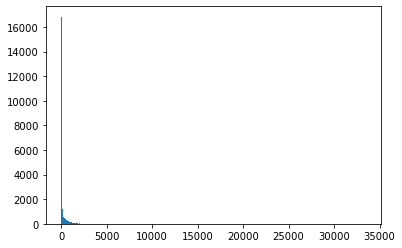

In [47]:
bp_zip_2['num_establishments'].hist(bins=1000, grid=False)

<AxesSubplot:>

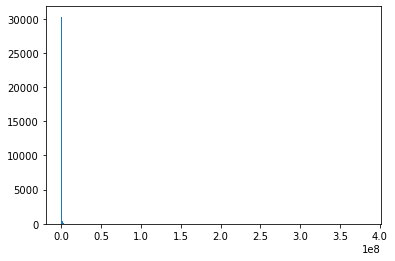

In [52]:
bp_zip_2['annual_payroll_1000s'].hist(bins=1000, grid=False)

<AxesSubplot:>

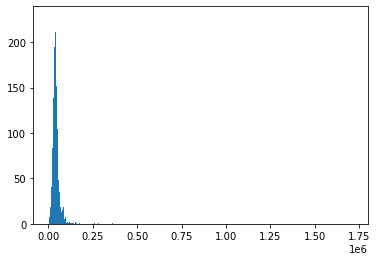

In [63]:
bp_zip_2['average_salary'].hist(bins=10000, grid=False)

## Total Population

In [64]:
os.chdir('/mnt/c/Users/jwnha/Documents/_School/MSDS/2022Summer/applicationDev/data/total_population')

In [65]:
tot_pop = pd.read_csv('tot_population_2020.csv')

In [66]:
tot_pop.head()

,B01003_001E,B01003_001M,GEO_ID,NAME
0,Estimate!!Total,Margin of Error!!Total,id,Geographic Area Name
1,16773,259,8600000US00601,ZCTA5 00601
2,37083,149,8600000US00602,ZCTA5 00602
3,45652,784,8600000US00603,ZCTA5 00603
4,6231,337,8600000US00606,ZCTA5 00606


In [67]:
tot_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   B01003_001E  33121 non-null  object
 1   B01003_001M  33121 non-null  object
 2   GEO_ID       33121 non-null  object
 3   NAME         33121 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [68]:
# Rename columns and drop the extra header row
tot_pop1 = tot_pop.rename(columns = {"B01003_001E": "total_pop", "NAME": "zip"})

In [72]:
tot_pop2 = tot_pop1.iloc[1:, :].drop(axis=1, columns=['B01003_001M','GEO_ID'])

In [74]:
# Remove ZCTA5 string and convert total_pop to int
tot_pop2['zip'] = tot_pop2['zip'].replace('ZCTA5 ', '', regex=True)
tot_pop2['total_pop'] = tot_pop2['total_pop'].astype(int)

In [75]:
tot_pop2

,total_pop,zip
1,16773,00601
2,37083,00602
3,45652,00603
4,6231,00606
5,26502,00610
...,...,...
33116,12,99923
33117,990,99925
33118,1582,99926
33119,0,99927


array([[<AxesSubplot:title={'center':'total_pop'}>]], dtype=object)

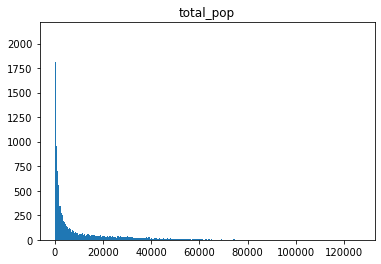

In [76]:
tot_pop2.hist(bins=1000, grid=False)